<a href="https://colab.research.google.com/github/satya8574/sample-project-docker-2024/blob/master/Day90%20CLT_and_Confidence_Intervals_Nov23_Morning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo -O weight-height.csv

--2024-06-11 01:57:04--  https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.google.com (drive.google.com)... 172.217.15.238, 2607:f8b0:4025:802::200e
Connecting to drive.google.com (drive.google.com)|172.217.15.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo [following]
--2024-06-11 01:57:04--  https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.07s   

2024-06-11 01:57:05 (5.96 MB/s) - ‘weight-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
df_hw = pd.read_csv("weight-height.csv")

In [ ]:
df_height = df_hw["Height"]

<Axes: xlabel='Height', ylabel='Count'>

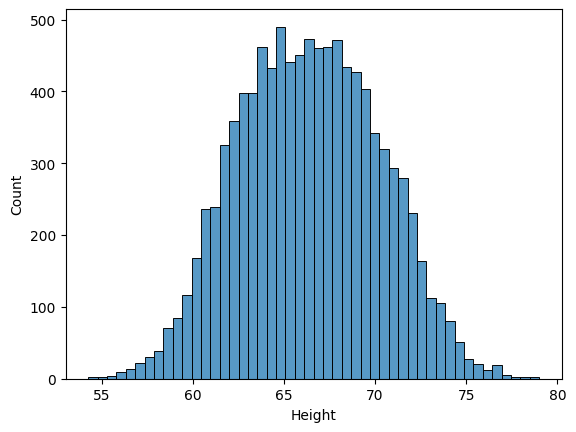

In [ ]:
sns.histplot(df_height)

In [ ]:
# SAMPLE SIZE = 5

np.mean(df_height.sample(5))

66.57396123312556

In [ ]:
sample_5 = [np.mean(df_height.sample(5)) for i in range(10000)]

<Axes: ylabel='Count'>

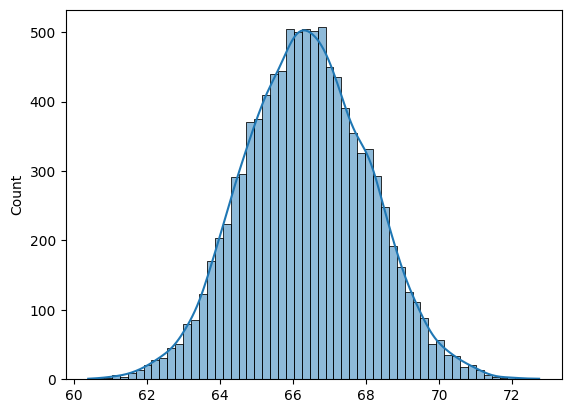

In [ ]:
sns.histplot(sample_5, kde = True)

In [ ]:
np.mean(sample_5)

66.36607847672774

In [ ]:
np.std(sample_5)

1.703233423596005

In [ ]:
# SAMPLE SIZE = 20

sample_20 = [np.mean(df_height.sample(20)) for i in range(10000)]

<Axes: ylabel='Count'>

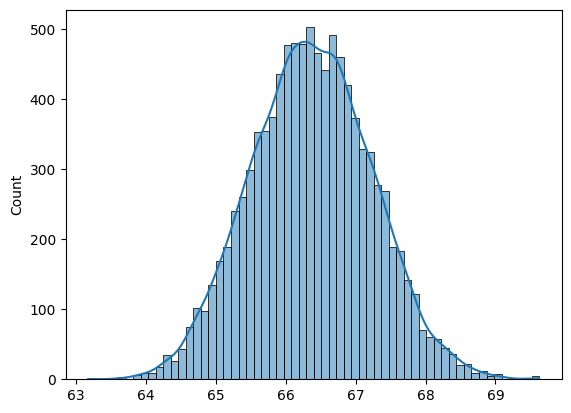

In [ ]:
sns.histplot(sample_20, kde = True)

In [ ]:
np.mean(sample_20)

66.37142087492752

In [ ]:
np.std(sample_20)

0.8585336364478364

In [ ]:
print(f"Mean (Population) - {np.mean(df_height)}, Mean (Sample 5) - {np.mean(sample_5)}, Mean (Sample 20) - {np.mean(sample_20)}")
print(f"Std (Population) - {np.std(df_height)}, Std (Sample 5) - {np.std(sample_5)}, Std (Sample 20) - {np.std(sample_20)}")

Mean (Population) - 66.36755975482124, Mean (Sample 5) - 66.36607847672774, Mean (Sample 20) - 66.37142087492752
Std (Population) - 3.84733573955754, Std (Sample 5) - 1.703233423596005, Std (Sample 20) - 0.8585336364478364


In [ ]:
# Sampling does not affect the mean value i.e. Mean (Sample) == Mean (Population)
# Increasing the size of the sample decreases the standard deviatiom

In [ ]:
len(df_height)

10000

In [ ]:
sample_10000 = [np.mean(df_height.sample(10000)) for i in range(10000)]

In [ ]:
np.std(sample_10000)

1.4234283312808894e-14

In [ ]:
sample_1000 = [np.mean(df_height.sample(1000)) for i in range(10000)]

In [ ]:
np.std(sample_1000)

0.1147727543768387

In [ ]:
population_mean = 122
population_sd = 10
n = 16

sample_mean = population_mean
sample_sd = population_sd / (n ** 0.5) # Standard Error

In [ ]:
sample_sd, sample_mean

(2.5, 122)

In [ ]:
z = (125 - sample_mean) / sample_sd

In [ ]:
z

1.2

In [ ]:
prob_gt_125 = 1 - norm.cdf(1.2)

In [ ]:
prob_gt_125

0.11506967022170822

In [ ]:
'''
In an e-commerce website, the average purchase amount per customer is 80 with a standard deviation of 15.
If we randomly select a sample of 50 customers,
what is the probability that the average purchase amount in the sample will be less than $75?
'''

'\nIn an e-commerce website, the average purchase amount per customer is 80 with a standard deviation of 15.\nIf we randomly select a sample of 50 customers,\nwhat is the probability that the average purchase amount in the sample will be less than $75?\n'

In [ ]:
population_mean = 80
population_sd = 15
n = 50

sample_mean = population_mean
sample_sd = population_sd / (n ** 0.5)

In [ ]:
sample_mean, sample_sd

(80, 2.1213203435596424)

In [ ]:
z = (75 - sample_mean) / sample_sd

In [ ]:
z

-2.3570226039551585

In [ ]:
norm.cdf(z)

0.009211062727049501

### Confidence Interval
- Along with the mean we will also calculate a margin of error.
- x -> mean +- x -> `[mean - x, mean + x]`

### Confidence
- 95% confidence means that my estimate is going to be correct 95 out of 100 times!
- The estimate can only fail 5 times.

In [ ]:
'''
The mean height of a sample of 100 adults was found to be 65 inches,
with a standard deviation of 2.5 inches.
Compute 95% confidence interval.
'''

'\nThe mean height of a sample of 100 adults was found to be 65 inches, \nwith a standard deviation of 2.5 inches.\nCompute 95% confidence interval.\n'

In [ ]:
n = 100
sample_mean = 65

# standard deviation is for the population and standard error is for a sample!
std = 2.5
std_error = 2.5 / np.sqrt(100)

In [ ]:
std_error

0.25

In [ ]:
z1 = norm.ppf(0.025)
z2 = norm.ppf(1 - 0.025)

In [ ]:
z1, z2

(-1.9599639845400545, 1.959963984540054)

In [ ]:
x1 = sample_mean + z1 * std_error
x2 = sample_mean + z2 * std_error

In [ ]:
[x1, x2]

[64.51000900386498, 65.48999099613502]

In [ ]:
norm.interval(0.95, loc = 65, scale = std_error)

(64.51000900386498, 65.48999099613502)

In [ ]:
'''
From a sample of 80 endangered birds,
the average wingspan was found to be 45 cm, with a population standard deviation of 10 cm.
What is the correct confidence interval of the mean wingspan of the entire population with 90% confidence.
'''

'\nFrom a sample of 80 endangered birds,\nthe average wingspan was found to be 45 cm, with a population standard deviation of 10 cm.\nWhat is the correct confidence interval of the mean wingspan of the entire population with 90% confidence.\n'

In [ ]:
n = 80
sample_mean = 45
population_sd = 10

std_error = population_sd / np.sqrt(n) # sample_sd

In [ ]:
z1 = norm.ppf(0.05)
z2 = norm.ppf(0.95)

x1 = sample_mean + z1 * std_error
x2 = sample_mean + z2 * std_error

print([x1, x2])

[43.16099773854971, 46.83900226145029]


In [ ]:
norm.interval(0.9, loc = 45, scale = std_error)

(43.16099773854971, 46.83900226145029)

In [ ]:
'''
In a software project, the team estimates bug resolution time at an average of 6 hours
with a standard deviation of 2 hours.
To estimate the mean resolution time with 99% confidence, the project manager samples 25 resolved bugs.
What is the correct confidence interval?
'''

'\nIn a software project, the team estimates bug resolution time at an average of 6 hours\nwith a standard deviation of 2 hours.\nTo estimate the mean resolution time with 99% confidence, the project manager samples 25 resolved bugs.\nWhat is the correct confidence interval?\n'

In [ ]:
sample_mean = 6
population_sd = 2
n = 25

std_error = population_sd / np.sqrt(n)

In [ ]:
norm.interval(0.99, loc = sample_mean, scale = std_error)

(4.96966827858044, 7.03033172141956)

In [ ]:
std_devs = [np.std([np.mean(df_height.sample(x)) for i in range(10000)]) for x in range(1, 10001, 100)]

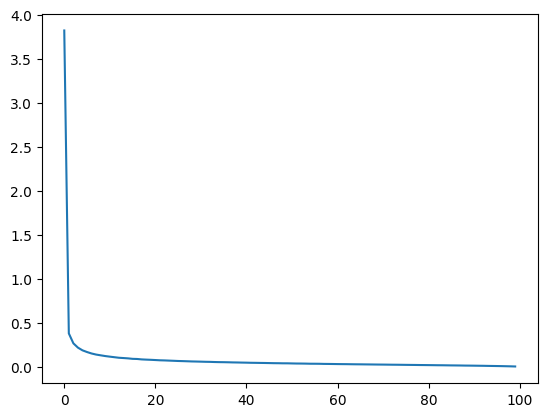

In [ ]:
plt.plot(std_devs)